In [79]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [97]:
data_air = pd.read_excel("AirQualityUCI.xlsx")
data_air.head() 

Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]

In [169]:
data_air = pd.read_excel("AirQualityUCI.xlsx")
dt_length = data_air['Time'].count()
arr = np.empty(dt_length)
k = 0 
# Так как время регистрировалось каждый час, имеет смысл избавиться от 00 минут и 00 секунд и оставить только часы 
for index, row in data_air.iterrows():
    time = row['Time']
    time = time.strftime("%H:%M:%S")
    time = time.replace(":","")
    time = int(time)/ 10000
    arr[k] = time
    k = k + 1
data_air_preprocessed = data_air
data_air_preprocessed['Time'] = arr 
data_air_preprocessed = data_air_preprocessed.sort_values(by='Time')
#Строки со значениями -200 не несут в себе никакой полезной информации 
data_air_preprocessed = data_air_preprocessed.drop(data_air_preprocessed[data_air_preprocessed["T"] < -50].index)
data_air_preprocessed = data_air_preprocessed.drop(data_air_preprocessed[data_air_preprocessed["CO(GT)"] < -50].index)
data_air_preprocessed.head()

Date  Time  CO(GT)  ...       T         RH        AH
6366 2004-12-01   0.0     2.2  ...   9.800  79.400002  0.962598
5646 2004-11-01   0.0     3.2  ...  20.075  71.299999  1.656382
4182 2004-09-01   0.0     1.9  ...  23.700  55.449999  1.603063
7398 2005-01-13   0.0     2.9  ...   9.425  75.025002  0.887428
7734 2005-01-27   0.0     0.2  ...   4.200  46.800000  0.390048

[5 rows x 15 columns]

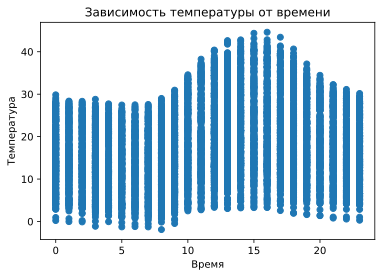

In [156]:
T = data_air_preprocessed['T']
Time = data_air_preprocessed['Time']
plt.scatter(Time, T)
plt.xlabel('Время')
plt.ylabel('Температура')
plt.title('Зависимость температуры от времени')
plt.show();
#Из графика видно что в среднем максимальная температура воздуха достигается в районе 15 часов а минимальная около 5

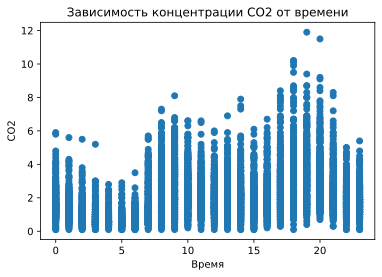

In [161]:
T = data_air_preprocessed['CO(GT)']
Time = data_air_preprocessed['Time']
plt.scatter(Time, T)
plt.xlabel('Время')
plt.ylabel('СО2')
plt.title('Зависимость концентрации СО2 от времени')
plt.show();
#Из графика видно что в среднем максимальная концентрация СО2 в воздухе достигается в районе 19 часов а минимальная около 5

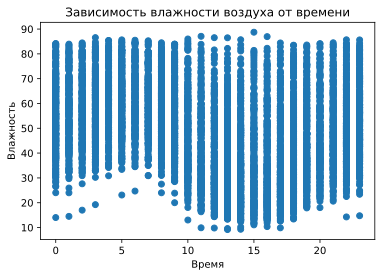

In [160]:
T = data_air_preprocessed['RH']
Time = data_air_preprocessed['Time']
plt.scatter(Time, T)
plt.xlabel('Время')
plt.ylabel('Влажность')
plt.title('Зависимость влажности воздуха от времени')
plt.show();
#Из графика видно что в среднем максимальная влажность воздуха достигается в районе 15 часов а минимальная около 6

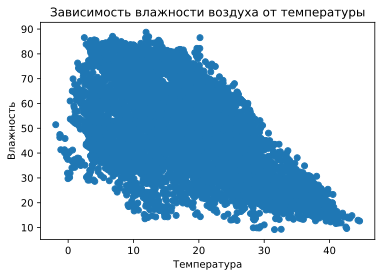

In [170]:
T = data_air_preprocessed['RH']
Time = data_air_preprocessed['T']
plt.scatter(Time, T)
plt.xlabel('Температура')
plt.ylabel('Влажность')
plt.title('Зависимость влажности воздуха от температуры')
plt.show();

In [171]:
#Из всего этого можно сделать вывод что "приятнее" всего дышать рано утром. Часов так в 5 ;)

In [172]:
data_air_preprocessed.to_csv('data_air_preprocessed.csv')

In [189]:
# Весь препроцесс покерного датасета заключался в смене расширения
data_poker = pd.read_csv('data_poker_test_preprocessed.csv')
data_poker.head()

Unnamed: 0  S1  C1  S2  C2  S3   C3   S4  C4  S5  C5  CLASS
0           0   1   1   1  13   2    4    2   3   1  12      0
1           1   3  12   3   2   3   11    4   5   2   5      1
2           2   1   9   4   6   1    4    3   2   3   9      1
3           3   1   4   3  13   2   13    2   1   3   6      1
4           4   3  10   2   7   1    2    2  11   4   9      0

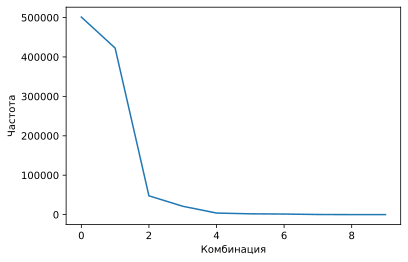

In [213]:
y = data_poker.groupby(['CLASS']).count()['S1'].to_numpy()
x = np.linspace(0, 9 , 10)
plt.plot(x, y)
plt.ylabel('Частота')
plt.xlabel('Комбинация')
plt.show();